In [16]:
%matplotlib inline

import numpy as np
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Lasso
from numpy.linalg import norm
from itertools import cycle
import matplotlib.pyplot as plt

In [17]:
## Read in the CSV data
data = np.loadtxt("diabetesX.csv",skiprows=1,delimiter=",")
response = np.loadtxt("diabetesY.csv")

In [18]:
alphas, coeffs, _ = lasso_path(data,response, n_alphas = 20)

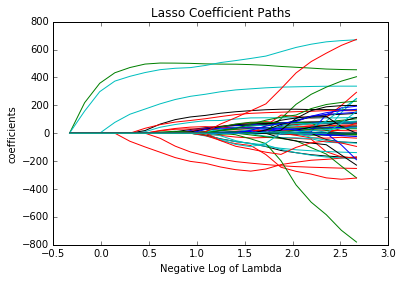

In [19]:
# Note: I have no idea what I'm doing here---a lot of this code was adapted from the example at
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html
colors = cycle(['b', 'r', 'g', 'c', 'k'])
nlalpha = -np.log10(alphas)

for coeff, col in zip(coeffs, colors):
    l1 = plt.plot(nlalpha, coeff, c=col)
    
plt.xlabel("Negative Log of Lambda")
plt.ylabel("coefficients")
plt.title("Lasso Coefficient Paths")

## With 60+ predictors, this gets messy

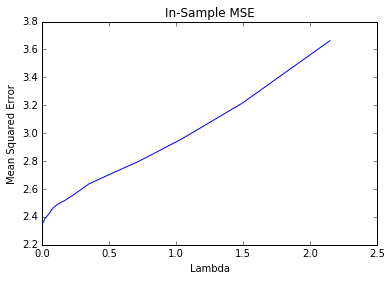

In [22]:
## Also need to track in-sample MSE--do this slightly back-assward by training models 
# on the alphas selected by lasso_path

mse = []

for a in alphas:
    thislasso = Lasso(alpha = a)
    thislasso.fit(data,response)
    predicted = thislasso.predict(data)
    diff = predicted - response
    thismse = norm(diff) / np.size(diff)
    mse.append(thismse)

plt.plot(alphas, mse)
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.title("In-Sample MSE")